<a href="https://colab.research.google.com/github/ucfilho/ANN_capstone_projects/blob/master/ANN_Ana_Pyrenn_dez_06_2018.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importa bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score 
from mpl_toolkits.mplot3d import Axes3D, axes3d
from scipy import optimize

! pip install pyrenn
import pyrenn as pn

  Running setup.py bdist_wheel for pyrenn ... - done
  Stored in directory: /root/.cache/pip/wheels/91/ed/b6/ab8600223e6ec9cea9592f0cf6e32db7abb4c2cc4c30b90eac
Successfully built pyrenn


In [2]:
#Clona a pasta do github
!git clone https://github.com/AnaSoldan/ANN

fatal: destination path 'ANN' already exists and is not an empty directory.


In [3]:
#Direciona para a pasta ANN
%cd ANN

/content/ANN


In [4]:
#Exibe o conteudo da pasta
!ls

Dados_extracao.csv  Extracao.csv  README.md


In [5]:
#Salva os dados da planilha na variavel
DADOS=pd.read_csv("Extracao.csv")
print(DADOS.head())

   Run  Temperature  Pressure  Particle_size  Flow_rate-CO2  Co-solvent  \
0    1           80       200           0.50             10           5   
1    2           80       275           0.75             10           5   
2    3           60       350           0.75             10           5   
3    4           60       275           0.75             10           0   
4    5           80       275           1.00              5           5   

   Observed_yield  Predicted_yield  
0          0.1289           0.1331  
1          0.3470           0.3604  
2          0.3430           0.3400  
3          0.2500           0.2539  
4          0.3000           0.2988  


In [0]:
#Codificacao dos dados
def Codificacao(x):
  strings=list(x)
  for i in strings:
    x_max=x[i].max()
    x_min=x[i].min()
    a=(x_max+x_min)/2
    b=(x_max-x_min)/2
    x[i]=(x[i]-a)/b
  return x

In [7]:
#Seleciona as colunas de interesse
Colunas=[1,2,3,4,5,6]
Sel_dados=[]
Sel_dados=DADOS.iloc[:,Colunas].copy()
print(Sel_dados.head())

   Temperature  Pressure  Particle_size  Flow_rate-CO2  Co-solvent  \
0           80       200           0.50             10           5   
1           80       275           0.75             10           5   
2           60       350           0.75             10           5   
3           60       275           0.75             10           0   
4           80       275           1.00              5           5   

   Observed_yield  
0          0.1289  
1          0.3470  
2          0.3430  
3          0.2500  
4          0.3000  


In [8]:
#Cria variavel de dados normatizados
Nor_dados=[]
Nor_dados=Codificacao(Sel_dados).copy()
print(Nor_dados.head())

   Temperature  Pressure  Particle_size  Flow_rate-CO2  Co-solvent  \
0          0.0      -1.0           -1.0            0.0         0.0   
1          0.0       0.0            0.0            0.0         0.0   
2         -1.0       1.0            0.0            0.0         0.0   
3         -1.0       0.0            0.0            0.0        -1.0   
4          0.0       0.0            1.0           -1.0         0.0   

   Observed_yield  
0       -0.648603  
1        0.569832  
2        0.547486  
3        0.027933  
4        0.307263  


In [9]:
#Seleciona os dados de treino e teste
linhas_train=range(32)
linhas_validation=[33,34,35,36,37,38]
linhas_test=[39, 40, 41, 42, 43, 44, 45]
Train=Nor_dados.iloc[linhas_train, :].copy()
Validation=Nor_dados.iloc[linhas_validation,:].copy()
Test=Nor_dados.iloc[linhas_test, :].copy()
print(Train.head())
print(Validation.head())
print(Test.head())

   Temperature  Pressure  Particle_size  Flow_rate-CO2  Co-solvent  \
0          0.0      -1.0           -1.0            0.0         0.0   
1          0.0       0.0            0.0            0.0         0.0   
2         -1.0       1.0            0.0            0.0         0.0   
3         -1.0       0.0            0.0            0.0        -1.0   
4          0.0       0.0            1.0           -1.0         0.0   

   Observed_yield  
0       -0.648603  
1        0.569832  
2        0.547486  
3        0.027933  
4        0.307263  
    Temperature  Pressure  Particle_size  Flow_rate-CO2  Co-solvent  \
33          0.0       1.0            0.0           -1.0         0.0   
34          0.0       0.0            0.0           -1.0         1.0   
35          0.0       0.0            0.0            0.0         0.0   
36          0.0       1.0            1.0            0.0         0.0   
37          0.0       1.0           -1.0            0.0         0.0   

    Observed_yield  
33        0

In [10]:
#Seleciona as variáveis independentes
x_train=Train.iloc[:,[0,1,2,3,4]].copy()
x_validation=Validation.iloc[:,[0,1,2,3,4]].copy()
x_test=Test.iloc[:,[0,1,2,3,4]].copy()
x_orig=DADOS.iloc[:,[1,2,3,4,5]].copy()
print(x_train.head())
print(x_test.head())
print(x_orig.head())

   Temperature  Pressure  Particle_size  Flow_rate-CO2  Co-solvent
0          0.0      -1.0           -1.0            0.0         0.0
1          0.0       0.0            0.0            0.0         0.0
2         -1.0       1.0            0.0            0.0         0.0
3         -1.0       0.0            0.0            0.0        -1.0
4          0.0       0.0            1.0           -1.0         0.0
    Temperature  Pressure  Particle_size  Flow_rate-CO2  Co-solvent
39          0.0       0.0            0.0            1.0        -1.0
40         -1.0       0.0            1.0            0.0         0.0
41          0.0       0.0            0.0           -1.0        -1.0
42          0.0       0.0            1.0            0.0         1.0
43          0.0       0.0           -1.0            1.0         0.0
   Temperature  Pressure  Particle_size  Flow_rate-CO2  Co-solvent
0           80       200           0.50             10           5
1           80       275           0.75             10  

In [11]:
#Seleciona as variaveis dependentes
y_train=Train.iloc[:,[5]].copy()
y_validation=Validation.iloc[:,[5]].copy()
y_test=Test.iloc[:,[5]].copy()
y_orig=DADOS.iloc[:,[6]].copy()
print(y_train.head())
print(y_test)
print(y_orig.head())

   Observed_yield
0       -0.648603
1        0.569832
2        0.547486
3        0.027933
4        0.307263
    Observed_yield
39        0.000000
40        0.544693
41       -0.477654
42        0.754190
43       -0.237430
44        0.251397
45       -0.040782
   Observed_yield
0          0.1289
1          0.3470
2          0.3430
3          0.2500
4          0.3000


In [12]:
#Seleciona os dados observados
linhas_train=range(32)
linhas_validation=[33,34,35,36,37,38]
linhas_test=[39, 40, 41, 42, 43, 44, 45]
y_obs_train=y_orig.iloc[linhas_train, [0]].copy()
y_obs_validation=y_orig.iloc[linhas_validation, [0]].copy()
y_obs_test=y_orig.iloc[linhas_test,[0]].copy()
print(y_obs_train.head())
print(y_obs_validation.head())
print(y_obs_test)

   Observed_yield
0          0.1289
1          0.3470
2          0.3430
3          0.2500
4          0.3000
    Observed_yield
33          0.3800
34          0.4031
35          0.3756
36          0.4050
37          0.2250
    Observed_yield
39          0.2450
40          0.3425
41          0.1595
42          0.3800
43          0.2025
44          0.2900
45          0.2377


In [13]:
#Transpõe os dataframes e transforma eles em matriz do numpy para que sejam compatíveis com o formato da rede (Treino)
x_train=x_train.T
y_train=y_train.T
print(x_train)
print(y_train)
x_train=np.array(x_train)
y_train=np.array(y_train)
print(x_train)
print(y_train)

                0    1    2    3    4    5    6    7    8    9  ...    22  \
Temperature    0.0  0.0 -1.0 -1.0  0.0  1.0  0.0  0.0 -1.0  1.0 ...   0.0   
Pressure      -1.0  0.0  1.0  0.0  0.0  0.0 -1.0 -1.0 -1.0  1.0 ...   0.0   
Particle_size -1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0 ...   1.0   
Flow_rate-CO2  0.0  0.0  0.0  0.0 -1.0 -1.0  0.0  1.0  0.0  0.0 ...   0.0   
Co-solvent     0.0  0.0  0.0 -1.0  0.0  0.0  1.0  0.0  0.0  0.0 ...  -1.0   

                23   24   25   26   27   28   29   30   31  
Temperature   -1.0 -1.0  0.0  1.0  0.0  1.0  0.0  0.0  1.0  
Pressure       0.0  0.0  0.0  0.0  0.0  0.0  1.0 -1.0  0.0  
Particle_size -1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  
Flow_rate-CO2  0.0  1.0  1.0  1.0  0.0  0.0  0.0 -1.0  0.0  
Co-solvent     0.0  0.0  0.0  0.0  0.0  1.0 -1.0  0.0 -1.0  

[5 rows x 32 columns]
                      0         1         2         3         4         5   \
Observed_yield -0.648603  0.569832  0.547486  0.027933  0.307263  0.09

In [14]:
#Transpõe os dataframes e transforma eles em matriz do numpy para que sejam compatíveis com o formato da rede (Validation)
x_validation=x_validation.T
y_validation=y_validation.T
print(x_validation)
x_validation=np.array(x_validation)
y_validation=np.array(y_validation)
print(x_validation)

                33   34   35   36   37   38
Temperature    0.0  0.0  0.0  0.0  0.0  1.0
Pressure       1.0  0.0  0.0  1.0  1.0  0.0
Particle_size  0.0  0.0  0.0  1.0 -1.0 -1.0
Flow_rate-CO2 -1.0 -1.0  0.0  0.0  0.0  0.0
Co-solvent     0.0  1.0  0.0  0.0  0.0  0.0
[[ 0.  0.  0.  0.  0.  1.]
 [ 1.  0.  0.  1.  1.  0.]
 [ 0.  0.  0.  1. -1. -1.]
 [-1. -1.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.]]


In [15]:
#Transpõe os dataframes e transforma eles em matriz do numpy para que sejam compatíveis com o formato da rede (Teste)
x_test=x_test.T
y_test=y_test.T
print(x_test)
x_test=np.array(x_test)
y_test=np.array(y_test)
print(x_test)

                39   40   41   42   43   44   45
Temperature    0.0 -1.0  0.0  0.0  0.0 -1.0  0.0
Pressure       0.0  0.0  0.0  0.0  0.0  0.0  0.0
Particle_size  0.0  1.0  0.0  1.0 -1.0  0.0 -1.0
Flow_rate-CO2  1.0  0.0 -1.0  0.0  1.0 -1.0  0.0
Co-solvent    -1.0  0.0 -1.0  1.0  0.0  0.0  1.0
[[ 0. -1.  0.  0.  0. -1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  1. -1.  0. -1.]
 [ 1.  0. -1.  0.  1. -1.  0.]
 [-1.  0. -1.  1.  0.  0.  1.]]


In [0]:
#Funcao que descodifica os dados
def Descodifica(x,x_old):
  strings=list(x)
  for i in strings:
    x_max=x_old[i].max()
    x_min=x_old[i].min()
    a=(x_max+x_min)/2
    b=(x_max-x_min)/2
    x[i]=x[i]*b+a
  return x

In [17]:
M=10
Melhor=1e99
ir=0
for i in range(1,M):
  clf = pn.CreateNN([5,(i),1]) #Substitui o MLPRegressor da sklearn. Cria uma rede com pesos aleatórios entre -0,5 e 0,5
  rede = pn.train_LM(x_train,y_train,clf,verbose=True,k_max=10,E_stop=1e-1) #Substitui o fit
  y_calc_train=[]
  y_calc_test=[]
  y_calc_train=pn.NNOut(x_train, clf) #substitui o predict
  y_calc_test=pn.NNOut(x_test, clf)
  y_calc_train=pd.DataFrame(y_calc_train)
  y_calc_test=pd.DataFrame(y_calc_test)
  y_calc_train.columns = ["Observed_yield"]
  y_calc_test.columns = ["Observed_yield"]
  y_calc_train=Descodifica(y_calc_train,y_orig)
  y_calc_test=Descodifica(y_calc_test,y_orig)
  mse=mean_squared_error(y_obs_test,y_calc_test)
  R2=r2_score(y_obs_test,y_calc_test)
  print("Neuronios=",i,"MSE teste=",mse,"R^2 teste=",R2)
  if(mse<Melhor):
    Melhor=mse.copy()
    ix=i
    redem=rede
    R2r=R2
print("\n Melhor resposta:")
print("Neuronios=",ix,"MSE teste=",Melhor,"R^2 teste=",R2r)

Iteration:  0 		Error:  11.957986797081576 	scale factor:  3.0
Iteration:  1 		Error:  8.905619161347806 	scale factor:  0.3
Iteration:  2 		Error:  7.911944264359926 	scale factor:  0.3
Iteration:  3 		Error:  2.3845782599354317 	scale factor:  0.03
Iteration:  4 		Error:  1.7270956714386692 	scale factor:  0.003
Iteration:  5 		Error:  1.633542623155066 	scale factor:  0.00030000000000000003
Iteration:  6 		Error:  1.6294204767944445 	scale factor:  3.0000000000000004e-05
Iteration:  7 		Error:  1.6290655943556198 	scale factor:  3.0000000000000005e-06
Iteration:  8 		Error:  1.629026843247869 	scale factor:  3.0000000000000004e-07
Iteration:  9 		Error:  1.6290210163186192 	scale factor:  3.0000000000000004e-08
Iteration:  10 		Error:  1.629019975747969 	scale factor:  3.0000000000000004e-09
Maximum number of iterations reached
Neuronios= 1 MSE teste= 0.0033413278316780917 R^2 teste= 0.3509707081977076
Iteration:  0 		Error:  30.352345473120778 	scale factor:  3.0
Iteration:  1 		Er

In [18]:
# Calcula o y predito usando a rede neural
y_calc_train=[]
y_calc_validation=[]
y_calc_test=[]
y_calc_train=pn.NNOut(x_train, redem)
y_calc_validation=pn.NNOut(x_validation, redem)
y_calc_test=pn.NNOut(x_test, redem)
#Transforma os dados de volta para dataframe
y_calc_train=pd.DataFrame(y_calc_train)
y_calc_validation=pd.DataFrame(y_calc_validation)
y_calc_test=pd.DataFrame(y_calc_test)

y_calc_train.columns = ["Observed_yield"]
y_calc_validation.columns = ["Observed_yield"]
y_calc_test.columns = ["Observed_yield"]
print(y_calc_train.head())
print(y_calc_validation)
print(y_calc_test)

   Observed_yield
0       -0.666668
1        0.639247
2        0.486767
3        0.068064
4        0.283143
   Observed_yield
0        0.713422
1        0.935931
2        0.639247
3        0.469774
4        0.410037
5       -0.223656
   Observed_yield
0        0.213955
1        0.574192
2       -0.456661
3        0.909078
4       -0.242539
5        0.478960
6       -0.121958


In [19]:
#Descodificacao dos dados calculados
y_calc_train_orig=Descodifica(y_calc_train,y_orig)
y_calc_validation_orig=Descodifica(y_calc_validation,y_orig)
y_calc_test_orig=Descodifica(y_calc_test, y_orig)
print(y_calc_train_orig.head())
print(y_calc_test_orig.head())

   Observed_yield
0        0.125666
1        0.359425
2        0.332131
3        0.257184
4        0.295683
   Observed_yield
0        0.283298
1        0.347780
2        0.163258
3        0.407725
4        0.201586


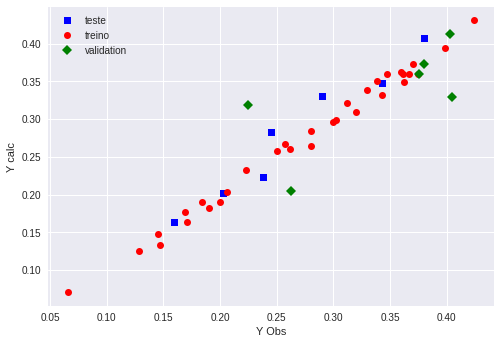

In [20]:
#Plota o gráfico
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)


plt.plot(y_obs_test,y_calc_test_orig, marker="s",linestyle = 'None', c='b', label='teste') #c=cor marker=tipo do marcador(aqui s significa square)
plt.plot(y_obs_train,y_calc_train_orig, marker="o",linestyle = 'None', c='r', label='treino')
plt.plot(y_obs_validation,y_calc_validation_orig, marker="D",linestyle = 'None', c='g', label='validation')


plt.legend(loc='upper left')
plt.ylabel('Y calc')
plt.xlabel('Y Obs')
plt.show()

In [21]:
mse=mean_squared_error(y_obs_train,y_calc_train)
print("MSE treino=",mse)
R2=r2_score(y_obs_train,y_calc_train)
print("R^2 treino=",R2)

MSE treino= 7.157770662195986e-05
R^2 treino= 0.9911327224087162


In [22]:
mse=mean_squared_error(y_obs_validation,y_calc_validation)
print("MSE validation=",mse)
R2=r2_score(y_obs_validation,y_calc_validation)
print("R^2 validation=",R2)

MSE validation= 0.0030351471054035684
R^2 validation= 0.3983542720170907


In [23]:
mse=mean_squared_error(y_obs_test,y_calc_test)
print("MSE teste=",mse)
R2=r2_score(y_obs_test,y_calc_test)
print("R^2 teste=",R2)

MSE teste= 0.000592661658453187
R^2 teste= 0.8848796658569532


In [0]:
def function(x):
  global clf
  x=x.reshape((5, 1))
  Y=pn.NNOut(x, redem)
  fun=Y*(-1)
  return fun

In [25]:
bounds = [(-2, 2),(-2, 2),(-2, 2),(-2, 2),(-2, 2)]
Condicoes = optimize.differential_evolution(function,bounds,
                                      init="latinhypercube", # obs: init="random"
                                      maxiter=100, popsize=50,recombination=0.5)
Condicoes=pd.DataFrame(Condicoes.x.reshape(1, 5))
Condicoes.columns=['Temperature', 'Pressure','Particle_size','Flow_rate-CO2','Co-solvent']
print(Condicoes)
Cond=Descodifica(Condicoes,x_orig)
print(Cond)

   Temperature  Pressure  Particle_size  Flow_rate-CO2  Co-solvent
0          2.0   0.79431       0.808351       0.110268         2.0
   Temperature    Pressure  Particle_size  Flow_rate-CO2  Co-solvent
0        120.0  334.573217       0.952088      10.551342        15.0
